## Multisensor Data Fusion with acceleration ($\ddot x$ and $\ddot y$) and position ($x$ and $y$).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sympy import Symbol, Matrix
from sympy.interactive import printing
printing.init_printing()

## State Vector
Constant Acceleration Model for Ego Motion in Plane
$$x_k= \left[ \begin{matrix} x \\ y \\ \dot x \\ \dot y \\ \ddot x \\ \ddot y \end{matrix} \right]$$

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]] (6, 1)


Text(0.5, 1.0, 'Initial Location')

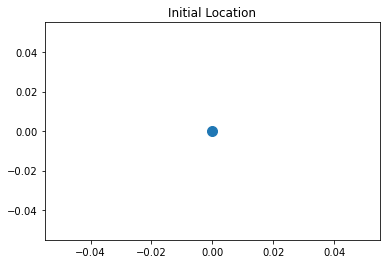

In [2]:
x = np.matrix([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]).T
print(x, x.shape)
n=x.size # States
plt.scatter(float(x[0]),float(x[1]), s=100)
plt.title('Initial Location')

In [3]:
P = np.diag([100.0, 100.0, 10.0, 10.0, 1.0, 1.0])
print(P, P.shape)

[[100.   0.   0.   0.   0.   0.]
 [  0. 100.   0.   0.   0.   0.]
 [  0.   0.  10.   0.   0.   0.]
 [  0.   0.   0.  10.   0.   0.]
 [  0.   0.   0.   0.   1.   0.]
 [  0.   0.   0.   0.   0.   1.]] (6, 6)


### Time Step between Filter Steps

In [4]:
dt = 0.1 

A = np.matrix([[1.0, 0.0, dt, 0.0, 1/2.0*dt**2, 0.0],
              [0.0, 1.0, 0.0, dt, 0.0, 1/2.0*dt**2],
              [0.0, 0.0, 1.0, 0.0, dt, 0.0],
              [0.0, 0.0, 0.0, 1.0, 0.0, dt],
              [0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])
print(A, A.shape)

[[1.    0.    0.1   0.    0.005 0.   ]
 [0.    1.    0.    0.1   0.    0.005]
 [0.    0.    1.    0.    0.1   0.   ]
 [0.    0.    0.    1.    0.    0.1  ]
 [0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.    0.    0.    1.   ]] (6, 6)


In [5]:
H = np.matrix([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
               [0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])
print(H, H.shape)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]] (4, 6)


In [6]:
dts = Symbol('\Delta t')
Qs = Matrix([[0.5*dts**2],[0.5*dts**2],[dts],[dts],[1.0],[1.0]])
Qs*Qs.T

/home/tfpeng/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/tfpeng/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/tfpeng/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/tfpeng/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDep

⎡             4               4              3              3              2  
⎢0.25⋅\Delta t   0.25⋅\Delta t   0.5⋅\Delta t   0.5⋅\Delta t   0.5⋅\Delta t   
⎢                                                                             
⎢             4               4              3              3              2  
⎢0.25⋅\Delta t   0.25⋅\Delta t   0.5⋅\Delta t   0.5⋅\Delta t   0.5⋅\Delta t   
⎢                                                                             
⎢            3               3             2              2                   
⎢0.5⋅\Delta t    0.5⋅\Delta t      \Delta t       \Delta t     1.0⋅\Delta t   
⎢                                                                             
⎢            3               3             2              2                   
⎢0.5⋅\Delta t    0.5⋅\Delta t      \Delta t       \Delta t     1.0⋅\Delta t   
⎢                                                                             
⎢            2               2                      

In [7]:
sa = 0.001
G = np.matrix([[1/2.0*dt**2],
               [1/2.0*dt**2],
               [dt],
               [dt],
               [1.0],
               [1.0]])
Q = G*G.T*sa**2

print(Q, Q.shape)

[[2.5e-11 2.5e-11 5.0e-10 5.0e-10 5.0e-09 5.0e-09]
 [2.5e-11 2.5e-11 5.0e-10 5.0e-10 5.0e-09 5.0e-09]
 [5.0e-10 5.0e-10 1.0e-08 1.0e-08 1.0e-07 1.0e-07]
 [5.0e-10 5.0e-10 1.0e-08 1.0e-08 1.0e-07 1.0e-07]
 [5.0e-09 5.0e-09 1.0e-07 1.0e-07 1.0e-06 1.0e-06]
 [5.0e-09 5.0e-09 1.0e-07 1.0e-07 1.0e-06 1.0e-06]] (6, 6)


In [8]:
I = np.eye(n)
print(I, I.shape)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]] (6, 6)


## Measurements
#### Assumption of  update rates:

1.Acceleration from IMU with 10Hz

2.Position from GPS with 1Hz

Which means, that every 10th of an acceleration measurement, there is a new position measurement from GPS. The Kalman Filter can perfectly handle this unsynchronous measurement incoming.


## Intialize:

*
1. Measurements
2.  Sigma for position
3.  x Position
4.  y Position


### Measurement Noise Covariance $R$

#### Intialize:
1.  ##### Noise of Acceleration Measurement $ra$
2.  ##### Noise of Position Measurement $rp$


In [9]:
ra = 10.0**2   # Noise of Acceleration Measurement
rp = 100.0**2  # Noise of Position Measurement
R = np.matrix([[rp, 0.0, 0.0, 0.0],
               [0.0, rp, 0.0, 0.0],
               [0.0, 0.0, ra, 0.0],
               [0.0, 0.0, 0.0, ra]])
print(R, R.shape)

[[10000.     0.     0.     0.]
 [    0. 10000.     0.     0.]
 [    0.     0.   100.     0.]
 [    0.     0.     0.   100.]] (4, 4)


In [10]:
m = 700

sp= 1.0 
px= 0.0
py= 0.0 

mpx = np.array(px+sp*np.random.randn(m))
mpy = np.array(py+sp*np.random.randn(m))

# Generate GPS Trigger
GPS=np.ndarray(m,dtype='bool')
GPS[0]=True
# Less new position updates
for i in range(1,m):
    if i%10==0:
        GPS[i]=True
    else:
        mpx[i]=mpx[i-1]
        mpy[i]=mpy[i-1]
        GPS[i]=False

In [168]:
GPS

array([ True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,

# Acceleration
### Sigma for acceleration in X and Y

In [11]:
sa= 0.1 
ax= 0.0 
ay= 0.0 

mx = np.array(ax+sa*np.random.randn(m))
my = np.array(ay+sa*np.random.randn(m))

In [12]:
measurements = np.vstack((mpx,mpy,mx,my))
print(measurements.shape)

(4, 700)


In [156]:
measurements

array([[-0.6889478 , -0.6889478 , -0.6889478 , ..., -0.64087444,
        -0.64087444, -0.64087444],
       [ 2.05407023,  2.05407023,  2.05407023, ..., -0.3029827 ,
        -0.3029827 , -0.3029827 ],
       [ 0.11503533,  0.09070637,  0.00233711, ..., -0.00781765,
         0.15003673, -0.1805174 ],
       [-0.10450718,  0.07364729,  0.02905628, ..., -0.02025587,
        -0.14383184, -0.06314529]])

In [13]:
def plot_measurements():
    fig = plt.figure(figsize=(16,9))
    plt.subplot(211)
    plt.step(range(m),mpx, label='$x$')
    plt.step(range(m),mpy, label='$y$')
    plt.ylabel(r'Position $m$')
    plt.title('Measurements')
    plt.ylim([-10, 10])
    plt.legend(loc='best',prop={'size':18})

    plt.subplot(212)
    plt.step(range(m),mx, label='$a_x$')
    plt.step(range(m),my, label='$a_y$')
    plt.ylabel(r'Acceleration $m/s^2$')
    plt.ylim([-1, 1])
    plt.legend(loc='best',prop={'size':18})

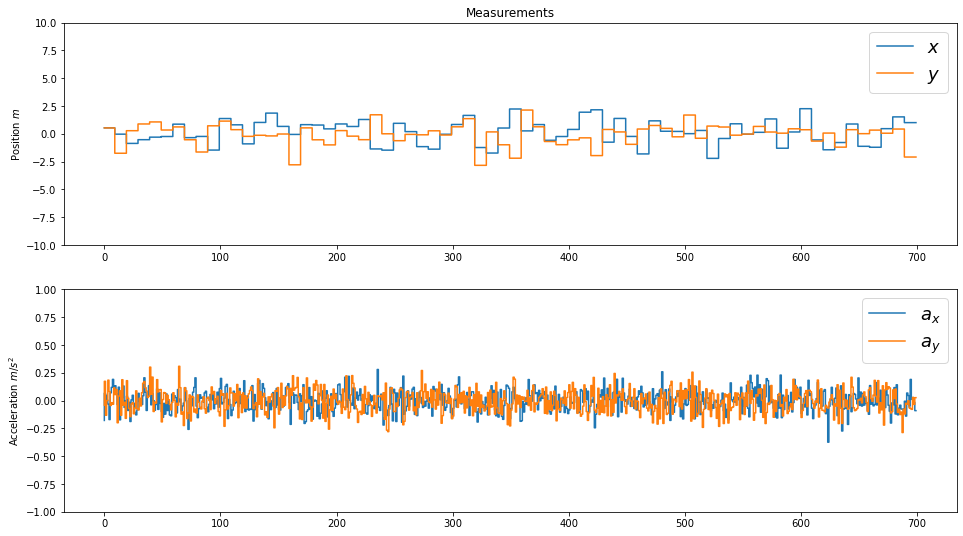

In [14]:
plot_measurements()

# Preallocation for Plotting

In [159]:
xt = []
yt = []
dxt= []
dyt= []
ddxt=[]
ddyt=[]
Zx = []
Zy = []
Px = []
Py = []
Pdx= []
Pdy= []
Pddx=[]
Pddy=[]
Kx = []
Ky = []
Kdx= []
Kdy= []
Kddx=[]
Kddy=[]


def savestates(x, Z, P, K):
    xt.append(float(x[0]))
    yt.append(float(x[1]))
    dxt.append(float(x[2]))
    dyt.append(float(x[3]))
    ddxt.append(float(x[4]))
    ddyt.append(float(x[5]))
    Zx.append(float(Z[0]))
    Zy.append(float(Z[1]))
    Px.append(float(P[0,0]))
    Py.append(float(P[1,1]))
    Pdx.append(float(P[2,2]))
    Pdy.append(float(P[3,3]))
    Pddx.append(float(P[4,4]))
    Pddy.append(float(P[5,5]))
    Kx.append(float(K[0,0]))
    Ky.append(float(K[1,0]))
    Kdx.append(float(K[2,0]))
    Kdy.append(float(K[3,0]))
    Kddx.append(float(K[4,0]))
    Kddy.append(float(K[5,0]))

#### The Usual Step :
1.  ##### Time Update (Prediction)
2.  ##### Project the state ahead
3.  ##### Project the error covariance ahead
4.  ##### Measurement Update (Correction)
5.  ##### if there is a GPS Measurement: Compute the Kalman Gain
6.  ##### Update the estimate via z
7.  ##### Update the error covariance
8.  ##### Save states for Plotting


In [160]:
for kalman_filter in range(m):   
    x = A*x    
    P = A*P*A.T + Q  
    
    if GPS[kalman_filter]:        
        S = H*P*H.T + R
        K = (P*H.T) * np.linalg.pinv(S)        
        Z = measurements[:,kalman_filter].reshape(H.shape[0],1)
        y = Z - (H*x)                            # Innovation or Residual
        x = x + (K*y)              
        P = (I - (K*H))*P

   
    
    
    savestates(x, Z, P, K)

In [172]:
def plot_P():
    fig = plt.figure(figsize=(16,9))
    plt.subplot(211)
    plt.plot(range(len(measurements[0])),Px, label='$x$')
    plt.plot(range(len(measurements[0])),Py, label='$y$')
    plt.title('Uncertainty (Elements from Matrix $P$)')
    plt.legend(loc='best',prop={'size':22})
    plt.subplot(212)
    plt.plot(range(len(measurements[0])),Pddx, label='$\ddot x$')
    plt.plot(range(len(measurements[0])),Pddy, label='$\ddot y$')

    plt.xlabel('Filter Step')
    plt.ylabel('')
    plt.legend(loc='best',prop={'size':22})

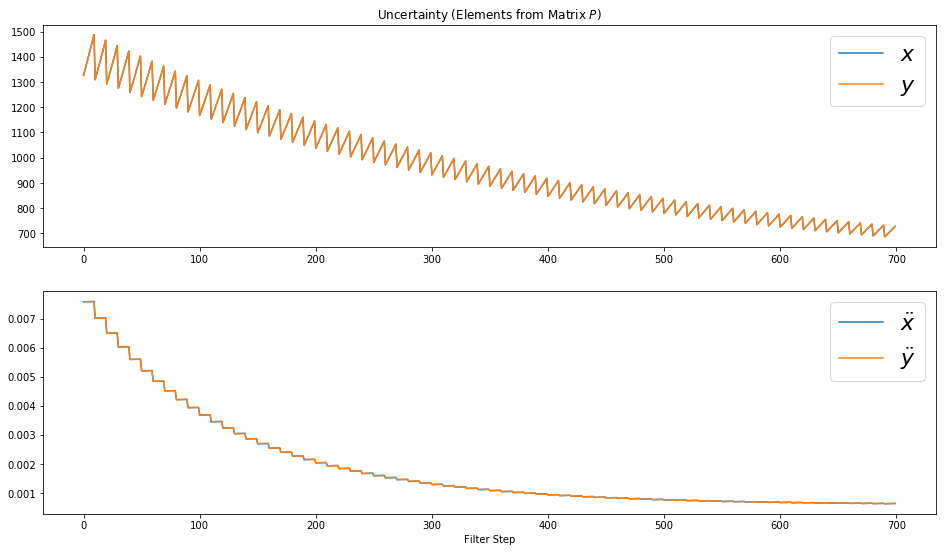

In [173]:
plot_P()

In [178]:
def plot_K_ddxy():
    fig = plt.figure(figsize=(16,9))
    #plt.plot(range(len(measurements[0])),Kx, label='Kalman Gain for $x$')
    #plt.plot(range(len(measurements[0])),Ky, label='Kalman Gain for $y$')
    #plt.plot(range(len(measurements[0])),Kdx, label='Kalman Gain for $\dot x$')
    #plt.plot(range(len(measurements[0])),Kdy, label='Kalman Gain for $\dot y$')
    plt.plot(range(len(measurements[0])),Kddx, label='Kalman Gain for $\ddot x$')
    plt.plot(range(len(measurements[0])),Kddy, label='Kalman Gain for $\ddot y$')

    plt.xlabel('Filter Step')
    plt.ylabel('')
    plt.title('Kalman Gain (the lower, the more the measurement fullfill the prediction)')
    plt.legend(loc='best',prop={'size':18})

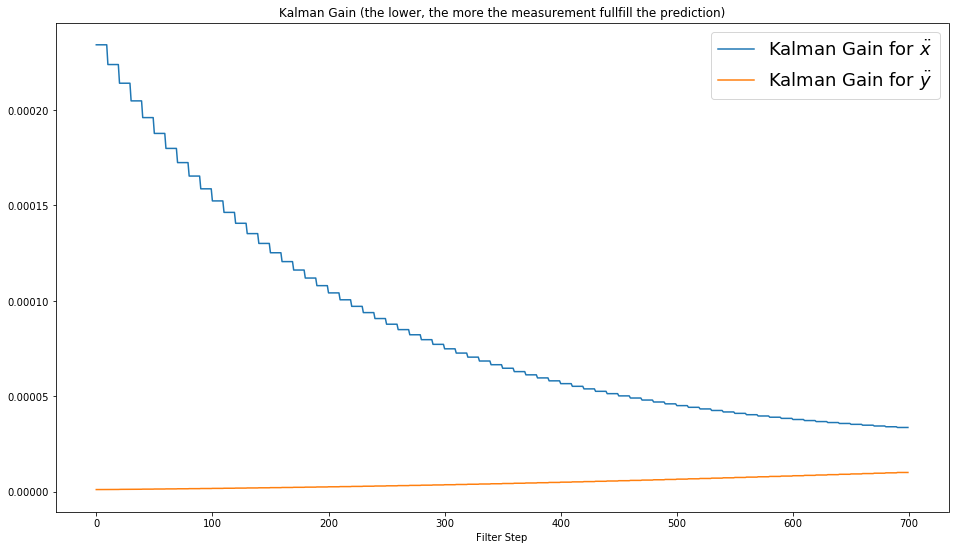

In [180]:
plot_K_ddxy()

In [181]:
def plot_K_dxy():
    fig = plt.figure(figsize=(16,9))
    #plt.plot(range(len(measurements[0])),Kx, label='Kalman Gain for $x$')
    #plt.plot(range(len(measurements[0])),Ky, label='Kalman Gain for $y$')
    plt.plot(range(len(measurements[0])),Kdx, label='Kalman Gain for $\dot x$')
    plt.plot(range(len(measurements[0])),Kdy, label='Kalman Gain for $\dot y$')
    #plt.plot(range(len(measurements[0])),Kddx, label='Kalman Gain for $\ddot x$')
    #plt.plot(range(len(measurements[0])),Kddy, label='Kalman Gain for $\ddot y$')

    plt.xlabel('Filter Step for dx and dy')
    plt.ylabel('')
    plt.title('Kalman Gain (the lower, the more the measurement fullfill the prediction)')
    plt.legend(loc='best',prop={'size':18})

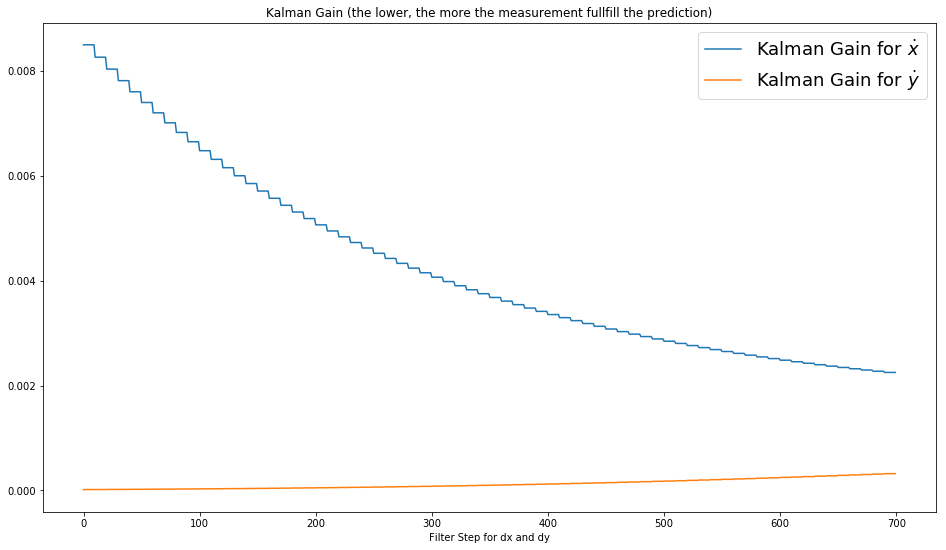

In [182]:
plot_K_dxy()

In [183]:
def plot_K_xy():
    fig = plt.figure(figsize=(16,9))
    plt.plot(range(len(measurements[0])),Kx, label='Kalman Gain for $x$')
    plt.plot(range(len(measurements[0])),Ky, label='Kalman Gain for $y$')
    #plt.plot(range(len(measurements[0])),Kdx, label='Kalman Gain for $\dot x$')
    #plt.plot(range(len(measurements[0])),Kdy, label='Kalman Gain for $\dot y$')
    #plt.plot(range(len(measurements[0])),Kddx, label='Kalman Gain for $\ddot x$')
    #plt.plot(range(len(measurements[0])),Kddy, label='Kalman Gain for $\ddot y$')

    plt.xlabel('Filter Step for x and y')
    plt.ylabel('')
    plt.title('Kalman Gain (the lower, the more the measurement fullfill the prediction)')
    plt.legend(loc='best',prop={'size':18})

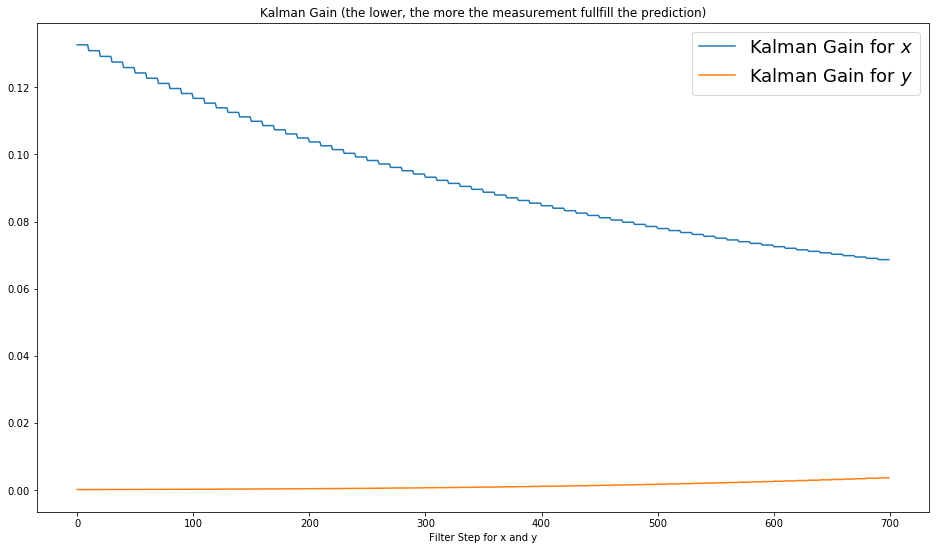

In [184]:
plot_K_xy()